<a href="https://colab.research.google.com/github/vadimkostoglodov482/LAbsJuPy/blob/main/%D0%9B%D0%B0%D0%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
N = ord("V") % 3 + 1
print(N)

3


Завантаження даних з Kaggle:

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("piterfm/2022-ukraine-russian-war")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/piterfm/2022-ukraine-russian-war/versions/412


Імпортуємо бібліотеки:

In [22]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Створемо функцію яка завантажить у вигляді масиву numpy, що спростить обробку

In [10]:
def load_column_data(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Пропускаємо заголовки
        column_index = headers.index(column_name)

        column_data = []
        for row in reader:
            # Перевіряємо, що значення не порожнє
            if row[column_index]:
                column_data.append(int(row[column_index]))

        return np.array(column_data)


Створемо масиву зі значень стовпця «APC» (Armored personnel carrier)

In [12]:
filename = f"{path}/russia_losses_equipment.csv"  # Замінюємо на правильний шлях
apc_data = load_column_data(filename, 'APC')


Знайдемо кількість добових втрат БТР:

In [13]:
daily_losses = np.diff(apc_data)
print("Добові втрати БТР:", daily_losses)


Добові втрати БТР: [ -39  -19  -51  -33  -30  -44  -19  -49  -27  -35  -14  -11  -30  -31
  -21  -31  -31  -17  -32  -44  -27  -38  -42  -52  -40  -12  -40  -30
  -52  -38  -39  -13   -3   -6   -8  -20  -40  -48  -17  -13  -19   -9
  -19    0   -9  -21  -27  -35  -26  -24  -14  -23  -18  -14  -19  -17
  -11  -21  -32  -25  -21  -26  -15   -7  -12  -35  -24  -17  -17   -5
  -13   -9   -9   -9  -29   -8  -31  -17  -27   -8  -42  -20  -38   -8
  -21  -24  -11  -26  -13  -20  -17  -46  -15  -19  -12   -9  -36  -15
  -32  -24  -23  -17  -11  -19  -40  -16  -18  -11  -17  -17  -16  -26
  -19  -25  -21   -9  -19  -18  -15  -15  -11  -35  -18  -12  -20  -18
   -6  -29  -26  -21  -11  -32  -13  -26   -9  -20  -40  -16  -18  -22
  -33  -12  -22  -22  -33  -40  -15  -17  -11  -27  -27  -22  -34  -35
  -35  -43  -14  -30  -48  -43  -42  -22  -40  -32  -35  -19  -14  -34
  -23  -27  -33  -29  -21  -39  -16  -20  -14  -15  -14  -12  -12   -8
  -23  -21  -17   -8  -18  -13  -31  -20  -47  -19  -12  -

Пошук 5 найбільших добових втрат БТР

In [16]:
top_5_losses = np.sort(daily_losses)[-5:]
print("5 найбільших добових втрат БТР:", top_5_losses)


5 найбільших добових втрат БТР: [ 0  0  0  0 14]


Знайдемо кількість знищених БТР влітку 2023 року. Для цього нам потрібно визначити індекси днів, що припадають на літо 2023 року. Вважаємо, що дати йдуть послідовно, тож можна знайти відповідні індекси за допомогою масиву дат.
---



In [24]:

# Припускаємо, що дані починаються з певної дати. Задайте реальну стартову дату, наприклад:
start_date = datetime.strptime('2022-02-24', '%Y-%m-%d')  # Змінити на відповідну дату
dates = [start_date + timedelta(days=i) for i in range(len(apc_data))]

# Фільтруємо дані за літо 2023
summer_2023_losses = [
    loss for date, loss in zip(dates, apc_data)
    if date >= datetime(2023, 6, 1) and date <= datetime(2023, 8, 31)
]
total_summer_2023_losses = sum(summer_2023_losses)
print("Кількість знищених БТР влітку 2023 року:", total_summer_2023_losses)



Кількість знищених БТР влітку 2023 року: 692250


Тепер знайдемо середнє значення знищених БТР за 100-500 днів війни

In [25]:
average_losses = np.mean(apc_data[100:500])
print("Середнє значення знищених БТР за 100-500 днів:", average_losses)


Середнє значення знищених БТР за 100-500 днів: 11208.66


Побудова графіка втрат БТР за останні 200 днів

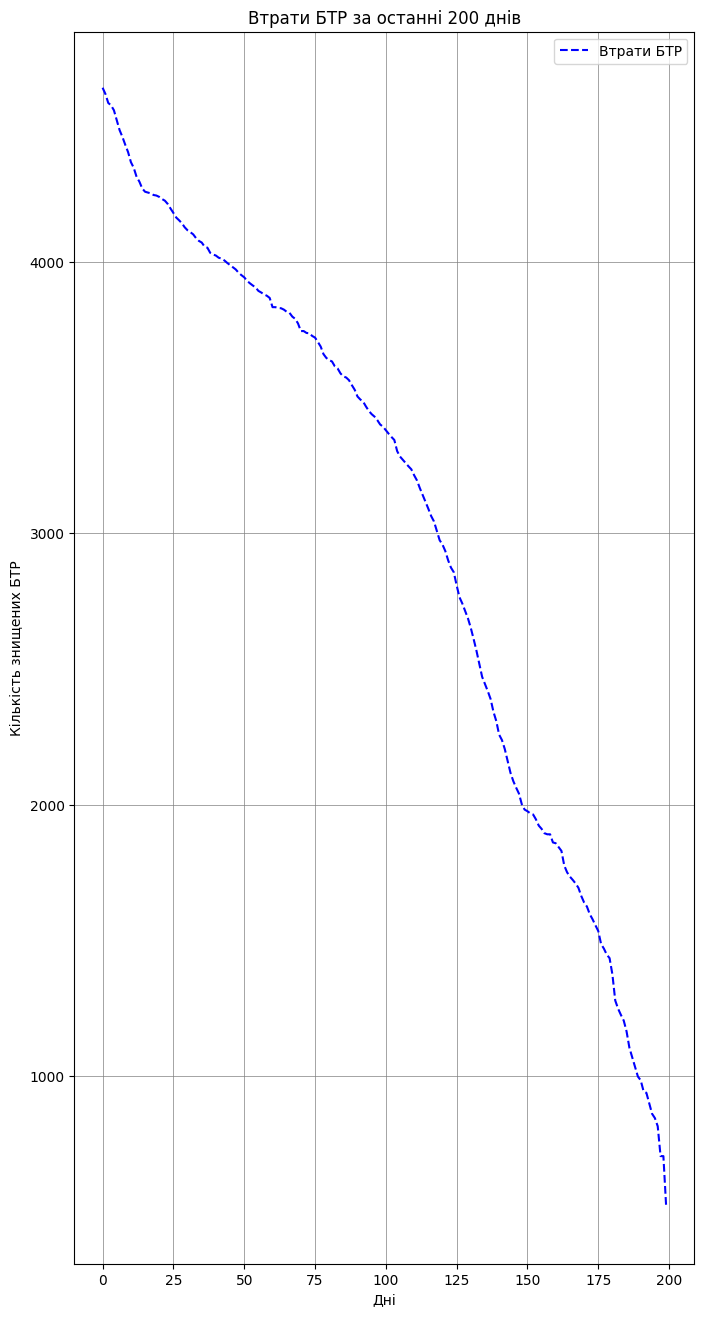

In [26]:
plt.figure(figsize=(8, 16), dpi=100)
plt.plot(range(200), apc_data[-200:], linestyle='--', color='b', label='Втрати БТР')

plt.title("Втрати БТР за останні 200 днів")
plt.xlabel("Дні")
plt.ylabel("Кількість знищених БТР")
plt.legend()
plt.grid(True, color='gray', linestyle='-', linewidth=0.5)
plt.savefig("apc_losses_last_200_days.png")
plt.show()


**Підсумок**

У ході лабораторної роботи були здобуті базові навички аналізу та візуалізації даних з використанням Python. На основі даних про втрати військової техніки вдалося виконати реалізацію функцію для завантаження даних з файлу CSV та створено масив даних із втрат бронетранспортерів (БТР), розрахування добової втрати БТР, визначено п’ять найбільших значень цих втрат, а також підраховано загальні втрати БТР у літні місяці 2023 року, розрахування середнього значення втрат БТР за період з 100-го по 500-й день війни. Було побудовано графік втрат БТР за останні 200 днів, який містить необхідні елементи форматування, такі як підписи осей, легенду, сітку тощо. Ця робота дозволила закріпити основи роботи з бібліотеками numpy для обробки числових даних і matplotlib для візуалізації, що є ключовими навичками для подальшого аналізу та інтерпретації даних.